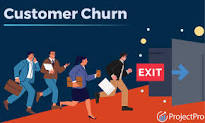


## **Business understanding**
### **Business Problem** : Predicting customer churn for Syria Tel Telecom 

**Background**

In today's competitive business space, retaining customers is very important for the sustained growth and success of any organization or business. Customer churn is a situation where customers discontinue their services or products and it poses a significant challenge to businesses across various industries. Identifying and predicting customer churn allows companies to proactively take measures to retain valuable customers, thereby reducing revenue loss and maintaining a loyal customer base.

This machine learning project aims to use advanced analytics and predictive modeling to forecast customer churn for Syria Tel, a telecommunications organization. By analyzing historical customer data, including patterns of how they use and customer's demographic information, the goal is to develop a predictive model that can identify customers with a higher risk of churning. The insights from the models will help Syria Tel company to empower its business and implement strategies that aim to increase retention of its customers, enhance customer satisfaction and maximise marketing efforts for their services.

### **Problem Statement** 

" Can we predict customer churn rate for Syria Tel Telecom and identify the key features leading to churn, to help the company with strategic planning for customer retention"

### **Key Objectives**

- To build a churn prediction model that can predict accurately customers with a high churn likelihood.
- To identify key features important in predicting customer churn.

### **Expected Outcome**


The primary performance metric for assessing our model is 'Recall'. Recall is also known as true positive rate. 
Recall masures the ability of  a model to identify all relevant instances in a dataset. Recall specifically returns the ration of true positives (Correctly identified positive instances) to the sum of true positives and false negatives (positive instances incorectly classified as negative), this makes its a primary metric for performance evalution of models that focus on capturing many true positive instances as possible, for example in our situation with Syria Tel Telecom where the cost of missing positive instances is high.
Failing to identify customers with a high posibillity of churning might cost the company than incorrectly labelling a non-churning customer.

Alongside recall, we need to ensure 'Precision' and 'Accuracy' to strike a balance. If our model predicts that all customers will churn then it'll be wrong because not all customers actually churn, although it achieves a perfcet recall but the results would not be practical.

**Import libraries**

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

## **Data Understanding**

### **Loading the Dataset**

This step will access the dataset's format, inspect the columns and have a general sense to the characteristics of the data before analysis and modelling tasks.

In [111]:
# Loading and previewing data
# Create Data class which has load_data method
class Data:
    def __init__(self):
        self.data = None
    
    def Load_data(self,filepath):
        self.data = pd.read_csv(filepath)
        print("Data loaded successfully")
        return self.data
    
    
        

In [112]:
data_file = 'SyriaTel Customer Churn.csv'

data = Data()
df = data.Load_data(data_file)
df.head()

Data loaded successfully


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [113]:
# Checking the last few rows of the dataset
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [114]:
# Generating descriptive statistics (mean, standard deviation, min, max, etc.) for numerical columns.
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [115]:
# Generate information about the dimensions of the DataFrame (number of rows, number of columns).
df.shape

(3333, 21)

In [116]:
# Checking the column names. 
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### **Columns Description**

- state: The state of the customer.
- account length: The length of the account in days or months.
- area code: The area code of the customer's phone number.
- phone number: The phone number of the customer.
- international plan: Whether the customer has an international plan or not.
- voice mail plan: Whether the customer has a voicemail plan or not.
- number vmail messages: The number of voicemail messages the customer has.
- total day minutes: Total minutes of day calls.
- total day calls: Total number of day calls.
- total day charge: Total charge for the day calls.
- total eve minutes: Total minutes of evening calls.
- total eve calls: Total number of evening calls.
- total eve charge: Total charge for the evening calls.
- total night minutes: Total minutes of night calls.
- total night calls: Total number of night calls.
- total night charge: Total charge for the night calls.
- total intl minutes: Total minutes of international calls.
- total intl calls: Total number of international calls.
- total intl charge: Total charge for the international calls.
- customer service calls: Number of times the customer called customer service.
- churn: Whether the customer churned or not (True/False)

The columns provide necessary information about the customers demographics , their usage patterns and other telecommunication data activities. By analysing these features they can help us understand different customers behaviours and predict churn which is the primary concern for Syria Tel.

In [117]:
# Getting a count of churned and non-churned customers
print(df['churn'].value_counts())

False    2850
True      483
Name: churn, dtype: int64


Get a concise summary of the DataFrame's structure

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### **Data Cleaning and Preparation**

#### **Checking for Null Values**


In [119]:
#Checking for null values 
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset has no null values. 

In [120]:
# Check for count of missing values in each column
df.isnull().sum()
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in any of the columns of our dataset.

In [121]:
# Checking for duplicated values in our dataset
len(df[df.duplicated()])

0

There are no duplicated values in our dataset as well.

From what we have observed about our dataset:
1. There are 3333 rows and 20 columns in our dataset.
2. In the dataset, there is one boolean data type that is the 'Churn'.
3. There are 8 float datatypes in the dataset.
4. There are integer data types in the dataset.
5. There are 3 object data type which also contains the categorical data of this dataset.
6. There are no missing values in the dataset so it was not necessary to impute any values.
7. The dataset also lacked any duplicated values of our data.
 

#### **Checking for place holders**

In [122]:
# Checking for place holders
columns = ['state','area code','international plan', 'voice mail plan', 'churn']  
unique_values = {}
for col in columns:
    unique_values[col] = df[col].unique()
unique_values

{'state': array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
        'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
        'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
        'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
        'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object),
 'area code': array([415, 408, 510], dtype=int64),
 'international plan': array(['no', 'yes'], dtype=object),
 'voice mail plan': array(['yes', 'no'], dtype=object),
 'churn': array([False,  True])}

There are no place holders in the selected columns of our dataset.

#### **Checking and converting datatypes**

In [123]:
# Checking data types of categorical variables
columns = ['state', 'area code', 'international plan', 'voice mail plan']
column_data_types = df[columns].dtypes
print(column_data_types)


state                 object
area code              int64
international plan    object
voice mail plan       object
dtype: object


In [124]:
# Convert "State" column to categorical data type
df["area code"] = df["area code"].astype("str")
print(df["area code"].dtype)

object


In [125]:
# Convert churn, international plan and  voice mail plan column from boolean to integer
df["churn"] = df["churn"].astype(int)
print(df["churn"].dtype)

int32


#### **Feature Engineering**

In [126]:
# Creating new features; Total charges, Total talktime, Total Calls and Average call duration per customer
df["Total charge"] = df[['total day charge', 'total eve charge', 'total night charge', 'total intl charge']].sum(axis=1)
df["Total Talk time"] = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].sum(axis=1)
df["Total calls"] = df[['total day calls', 'total eve calls', 'total night calls', 'total intl calls']].sum(axis=1)
df["Avg Call duration"]= df["Total Talk time"] / df["Total calls"]

In [127]:
# Creating day to night ratio per customer column
df["day_night_ratio"] = df["total day calls"]/df["total night calls"]
print(df["day_night_ratio"].describe())

count    3333.000000
mean        1.047618
std         0.323065
min         0.000000
25%         0.826923
50%         1.000000
75%         1.216867
max         3.939394
Name: day_night_ratio, dtype: float64


On average, customers seem to make more calls during the day as compared to a night.

In [128]:
# Creating columns for charges per call for night, day, evening and international calls per customer
df["charge_per_call_night"] = df["total night charge"] / df["total night minutes"]
df["charge_per_call_day"] = df["total day charge"] / df["total day minutes"]
df["charge_per_call_eve"]= df["total eve charge"] / df["total eve minutes"]
df["charge_per_call_intl"] = df["total intl charge"] / df["total intl minutes"]

In [129]:
# Printing a Summary statistics for the different charges of calls.
summary_stats = df[["charge_per_call_night", "charge_per_call_day", "charge_per_call_eve", "charge_per_call_intl"]].describe()
summary_stats

,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl
count,3333.000000,3331.000000,3332.000000,3315.000000
mean,0.045000,0.170003,0.085001,0.270057
std,0.000017,0.000028,0.000016,0.000329
min,0.044828,0.169231,0.084936,0.268182
25%,0.044988,0.169989,0.084988,0.269811
50%,0.045000,0.170004,0.085000,0.270000
75%,0.045013,0.170017,0.085013,0.270297
max,0.045111,0.170513,0.085075,0.272727


The average rates for calls is as follows:
1. Nightime calls is 4.5 cents p/m
2. Daytime calls is 17 cents p/m.
3. Evening calls is 8.5 cents p/m.
4. International calls is 27 cents p/m.

In [130]:
# Creating a voice message to call ratio for each customer
df["voice_message_call_ratio"] = df["number vmail messages"]/ df["Total calls"]
df["voice_message_call_ratio"].describe()

count    3333.000000
mean        0.026910
std         0.045928
min         0.000000
25%         0.000000
50%         0.000000
75%         0.062670
max         0.188525
Name: voice_message_call_ratio, dtype: float64

##  **Explatory Data Analysis.**

### **Univariate Analysis**

In [131]:
df.describe(include="all")

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,Total charge,Total Talk time,Total calls,Avg Call duration,day_night_ratio,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl,voice_message_call_ratio
count,3333,3333.000000,3333,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3331.000000,3332.000000,3315.000000,3333.000000
unique,51,NaN,3,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WV,NaN,415,344-3145,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,106,NaN,1655,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,101.064806,NaN,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,59.449754,591.864776,305.137114,1.964884,1.047618,0.045000,0.170003,0.085001,0.270057,0.026910
std,NaN,39.822106,NaN,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,10.502261,89.954251,34.448164,0.376958,0.323065,0.000017,0.000028,0.000016,0.000329,0.045928
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,22.930000,284.300000,191.000000,0.798596,0.000000,0.044828,0.169231,0.084936,0.268182,0.000000
25%,NaN,74.000000,NaN,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,52.380000,531.500000,282.000000,1.705187,0.826923,0.044988,0.169989,0.084988,0.269811,0.000000
50%,NaN,101.000000,NaN,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,59.470000,593.600000,305.000000,1.939936,1.000000,0.045000,0.170004,0.085000,0.270000,0.000000
75%,NaN,127.000000,NaN,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,66.480000,652.400000,328.000000,2.195963,1.216867,0.045013,0.170017,0.085013,0.270297,0.062670


1. **International Plan** has customers either subscribed or not, that is yes and no with 3010 nos
2. **Voice mail plan** has customers either subscribed or not , that is either yes or no with 2411 not subscribed to voice mail.
3. **Voice mail messages** have a mean of 8.9 with a max of 51.
4. **Total evening calls** have a mean of 100 .
5. **Total evening minutes** have a mean of 200 minutes.
6. **Customer service calls**  have a mean of 2 minutes 
7. Sumamry from other columns can be observed from above.
8. Churn being our target variable, there are no statistics to it. 

This will analyse what our Dependent variable says to us that is 'Churn'

In [132]:
# Printing unique values in the 'Churn' column 
df['churn'].unique()

array([0, 1])

In [133]:
# Printing the count of True and False in the churn feature
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

As we can see 2850 are not churned and 483 are actually churned.

Here we will go ahead and visualize this to have a visual idea of what this looks like.

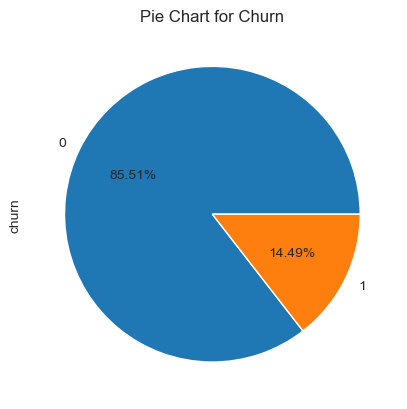

In [134]:
# Plotting to see the distribution of Churn
df['churn'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.title('Pie Chart for Churn')
plt.show()


Churn has a rate of 14%

This pie plot shows that 86% of the customers are sticking with Syria Tel company and 14% of the customers are getting churned. 

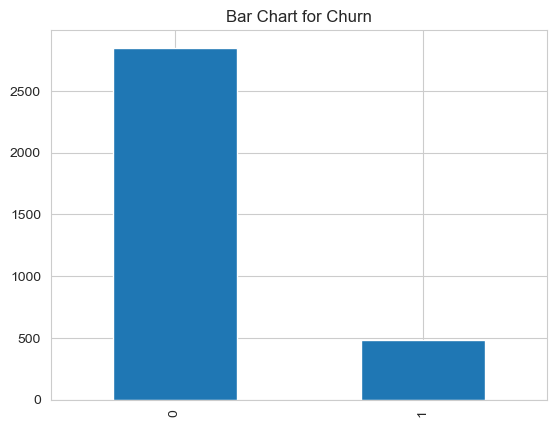

In [135]:
# Plotting a bar chart to see the distribution of Churn 
df['churn'].value_counts().plot(kind = 'bar')
plt.title('Bar Chart for Churn')
plt.show()

Now that we have seen a visual presentation of churn, lets take a deep dive and see how other features are related to churn and find their correlation.

### **Bivariate Analysis**

## 1. State Column 

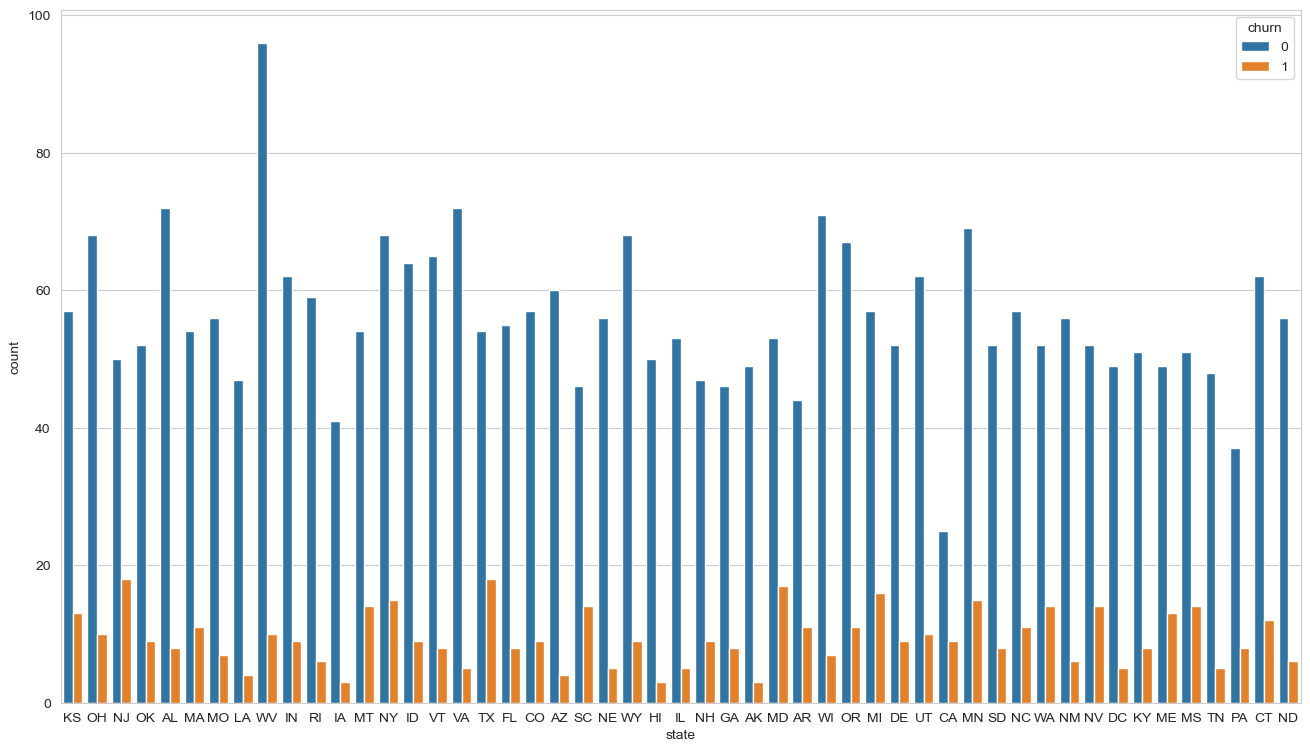

In [136]:
# Comparing state and churn features using a countplot.
sns.set_style('whitegrid')
plt.figure(figsize = (16, 9))
ax = sns.countplot(x = 'state', hue = 'churn', data = df)
plt.show()


From the countplot showing chrun distribution for each state, we can see states like WV, VA, NY, OH, TX state have the highest customer churn rate and states like  CA, AZ, CA, IA  have the lowest customer churn rate.

We are going to plot the same in a bar chart to have  a better look at the churn rate in relation to state feature of our data.

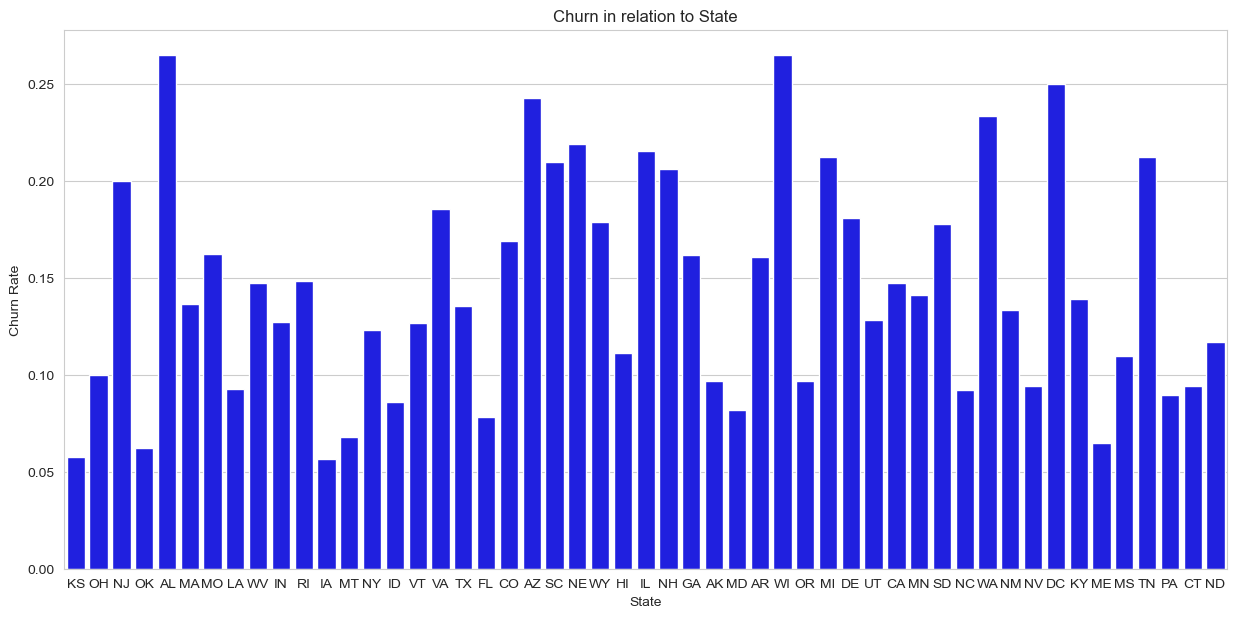

In [137]:
# 'state' is the categorical variable and 'churn' is the binary target variable in our DataFrame
a1 = df['state'].unique()
a2 = df.groupby(['state'])['churn'].mean()

plt.figure(figsize=(15, 7))

sns.barplot(x=a1, y=a2, color='blue')

plt.title('Churn in relation to State')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.show()


This shows pretty much the same thing with WV state having the highest churn rate.

We will go ahead and use a bar chart to display the top 5 states with the highest churn rate.


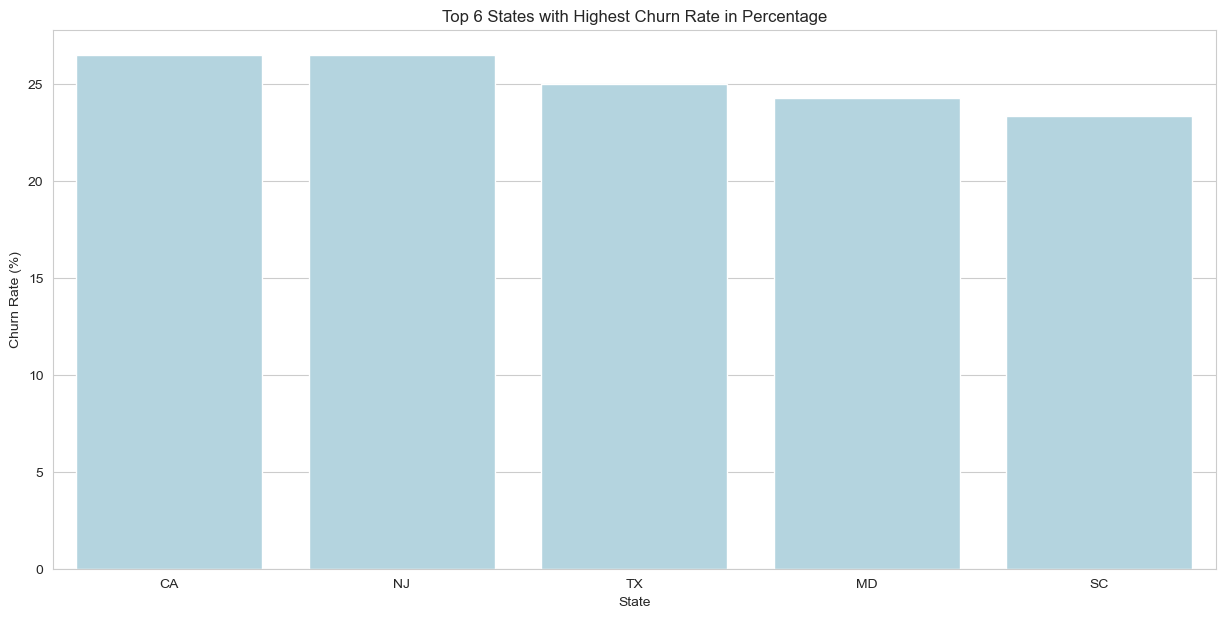

In [138]:
# with state as the categorical variable and 'churn' as the binary target variable in our DataFrame
states = df['state'].unique()
# Calculate churn rate in percentage for each state
churn_rate_percentage = df.groupby(['state'])['churn'].mean() * 100  

# Sort the states based on churn rate in descending order and select the top 5
top_states = churn_rate_percentage.sort_values(ascending=False).head(5)

plt.figure(figsize=(15, 7))

sns.barplot(x=top_states.index, y=top_states.values, color='lightblue')

plt.title('Top 6 States with Highest Churn Rate in Percentage')
plt.xlabel('State')
plt.ylabel('Churn Rate (%)')
plt.show()


This shows that the states with the highest churn rate are CA, NJ, TX, MD and SC as our top 5. 

Lets go ahead and look at the top 10 states and their churn rate in an ascending order 

### **Churn by Categorical Features**

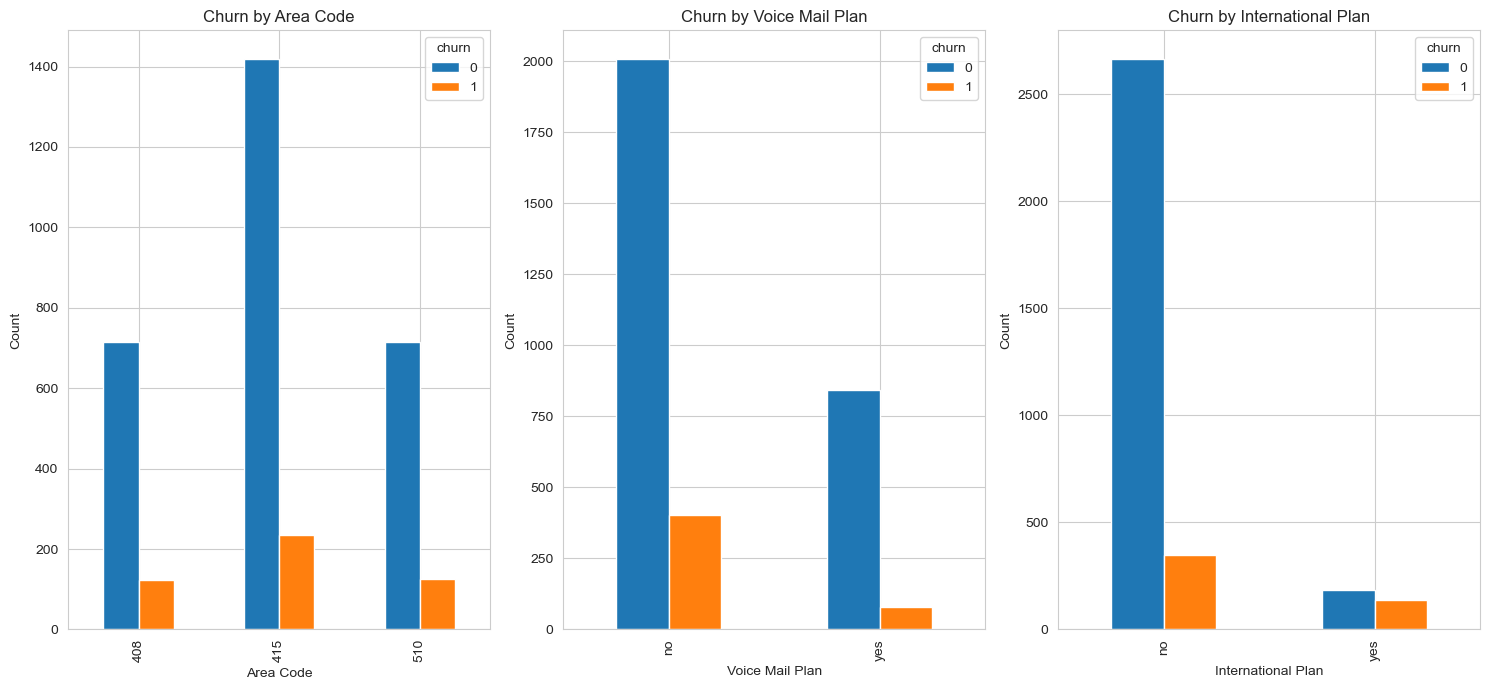

In [139]:
# figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

# Group by "area code" and "churn", then unstack and plot
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[0])
axs[0].set_title('Churn by Area Code')
axs[0].set_xlabel('Area Code')
axs[0].set_ylabel('Count')

# Group by "voice mail plan" and "churn", then unstack and plot
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[1])
axs[1].set_title('Churn by Voice Mail Plan')
axs[1].set_xlabel('Voice Mail Plan')
axs[1].set_ylabel('Count')

# Group by "international plan" and "churn", then unstack and plot
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[2])
axs[2].set_title('Churn by International Plan')
axs[2].set_xlabel('International Plan')
axs[2].set_ylabel('Count')

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

From the above we can see we have 3 unique area codes and the churn rate is almost the same for the three area codes that is 408, 415 and 510.

Customers with a voice mail plan tend to churn more.

Customers with international plans churned less compared to customers without international plans.

In [140]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

### **Churn vs Numerical values**

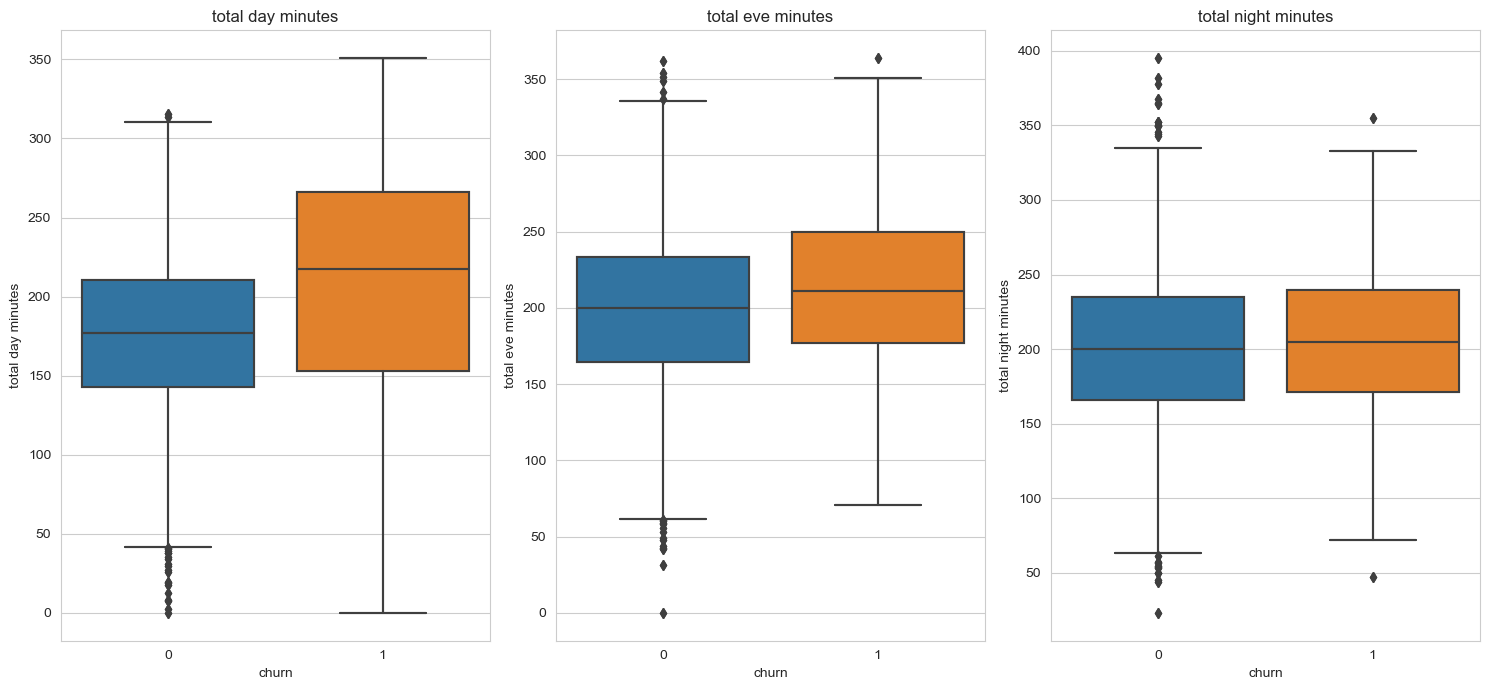

In [141]:
# Figure size and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

#numerical columns 
numerical_columns = ["total day minutes", "total eve minutes", "total night minutes"]

#loop through numerical columns
for i in enumerate(numerical_columns):
    sns.boxplot(x="churn", y=i[1], data=df, ax=axs[i[0]])
    axs[i[0]].set_title(i[1])

    sns.boxplot(x="churn", y=i[1], data=df, ax=axs[i[0]])
    axs[i[0]].set_title(i[1])

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

For all the minutes, churned customers have a slightly higher minutes compared to non churned customers. 


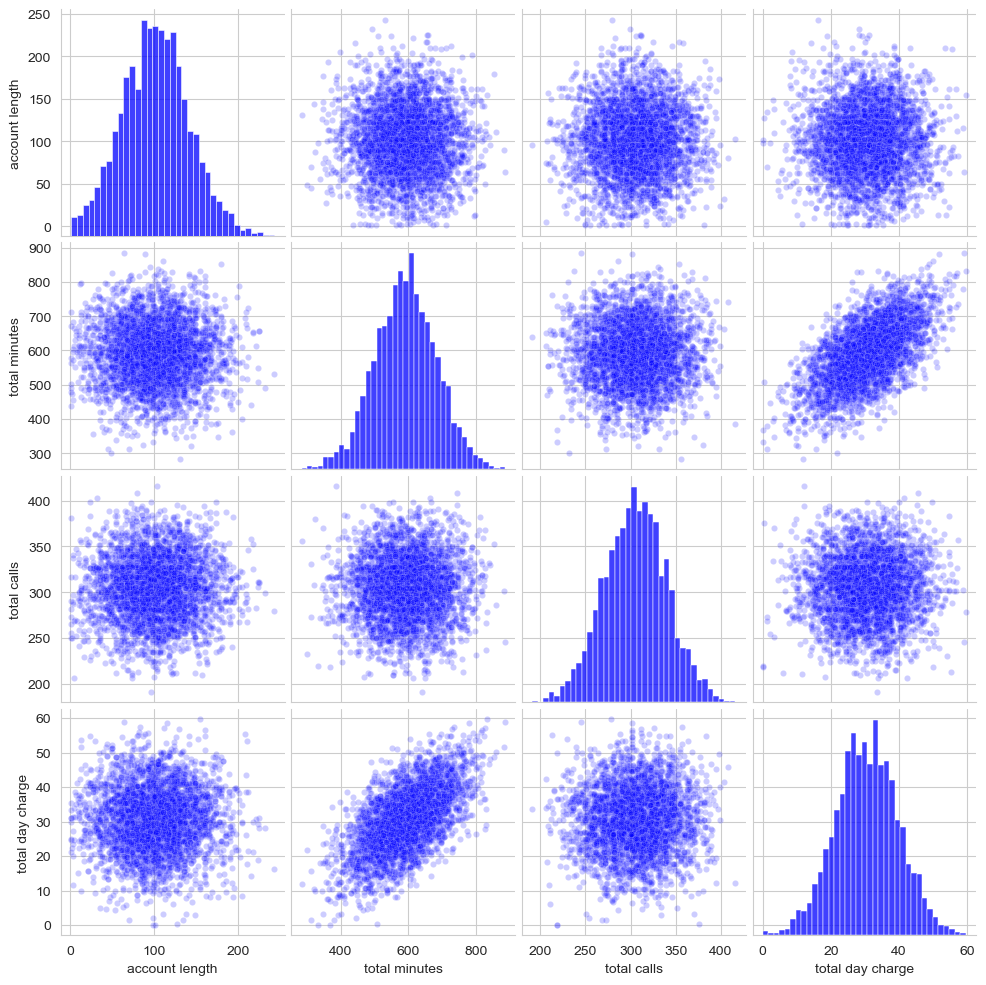

In [142]:
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
numeric=['account length','total minutes', 'total calls', 'total day charge']

sns.pairplot(df[numeric],diag_kws={'color':'blue'}, plot_kws={'alpha':0.2, 'linewidths':0.4, 's':20, 'edgecolors':'red', 'color':'blue'})

In the histograms along the diagonal we can see that each of the distributions is close to normal

### **Data Preprocessing**

#### **Checking for correlation**

In [143]:
## Defining a function to check highly correlated features
def check_multicollinearity(df, threshold=0.8):
    corr_matrix = df.select_dtypes(include=np.number).corr().abs()
    correlated_pairs = set()
    for col in corr_matrix:
        correlated_cols = corr_matrix.index[corr_matrix[col] > threshold]
        correlated_pairs.update([(min(col, correlated_col), max(col, correlated_col)) for correlated_col in correlated_cols if col != correlated_col])
    for pair in correlated_pairs:
        print(f"{pair[0]} --- {pair[1]}")
    return set(df.columns) & set(col for pair in correlated_pairs for col in pair)

# Call the function to check multicollinearity
multicollinear_features = check_multicollinearity(df)

total eve charge --- total eve minutes
number vmail messages --- voice_message_call_ratio
Total Talk time --- Total charge
Total Talk time --- total minutes
Total charge --- total day charge
total day charge --- total day minutes
Total calls --- total calls
Total charge --- total day minutes
total intl charge --- total intl minutes
total night charge --- total night minutes
Total charge --- total minutes


In [144]:
# Drop columns with multicollinearity
features = ['total day minutes', 'number vmail messages','total minutes', 'total day minutes', 'Total charge', 'total intl charge', 'total night minutes', 'total eve minutes', 'Total charge']
df = df.drop(features, axis=1)
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,total day calls,total day charge,total eve calls,total eve charge,...,Total Talk time,Total calls,Avg Call duration,day_night_ratio,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl,voice_message_call_ratio,total calls
0,KS,128,415,382-4657,no,yes,110,45.07,99,16.78,...,717.2,303,2.366997,1.208791,0.044994,0.170011,0.085005,0.270000,0.082508,303
1,OH,107,415,371-7191,no,yes,123,27.47,103,16.62,...,625.2,332,1.883133,1.194175,0.045008,0.169988,0.085013,0.270073,0.078313,332
2,NJ,137,415,358-1921,no,no,114,41.38,110,10.30,...,539.4,333,1.619820,1.096154,0.045018,0.170008,0.084983,0.269672,0.000000,333
3,OH,84,408,375-9999,yes,no,71,50.90,88,5.26,...,564.8,255,2.214902,0.797753,0.044997,0.170007,0.084976,0.269697,0.000000,255
4,OK,75,415,330-6626,yes,no,113,28.34,122,12.61,...,512.0,359,1.426184,0.933884,0.044997,0.170006,0.085030,0.270297,0.000000,359


In [145]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'customer service calls', 'churn',
       'Total Talk time', 'Total calls', 'Avg Call duration',
       'day_night_ratio', 'charge_per_call_night', 'charge_per_call_day',
       'charge_per_call_eve', 'charge_per_call_intl',
       'voice_message_call_ratio', 'total calls'],
      dtype='object')

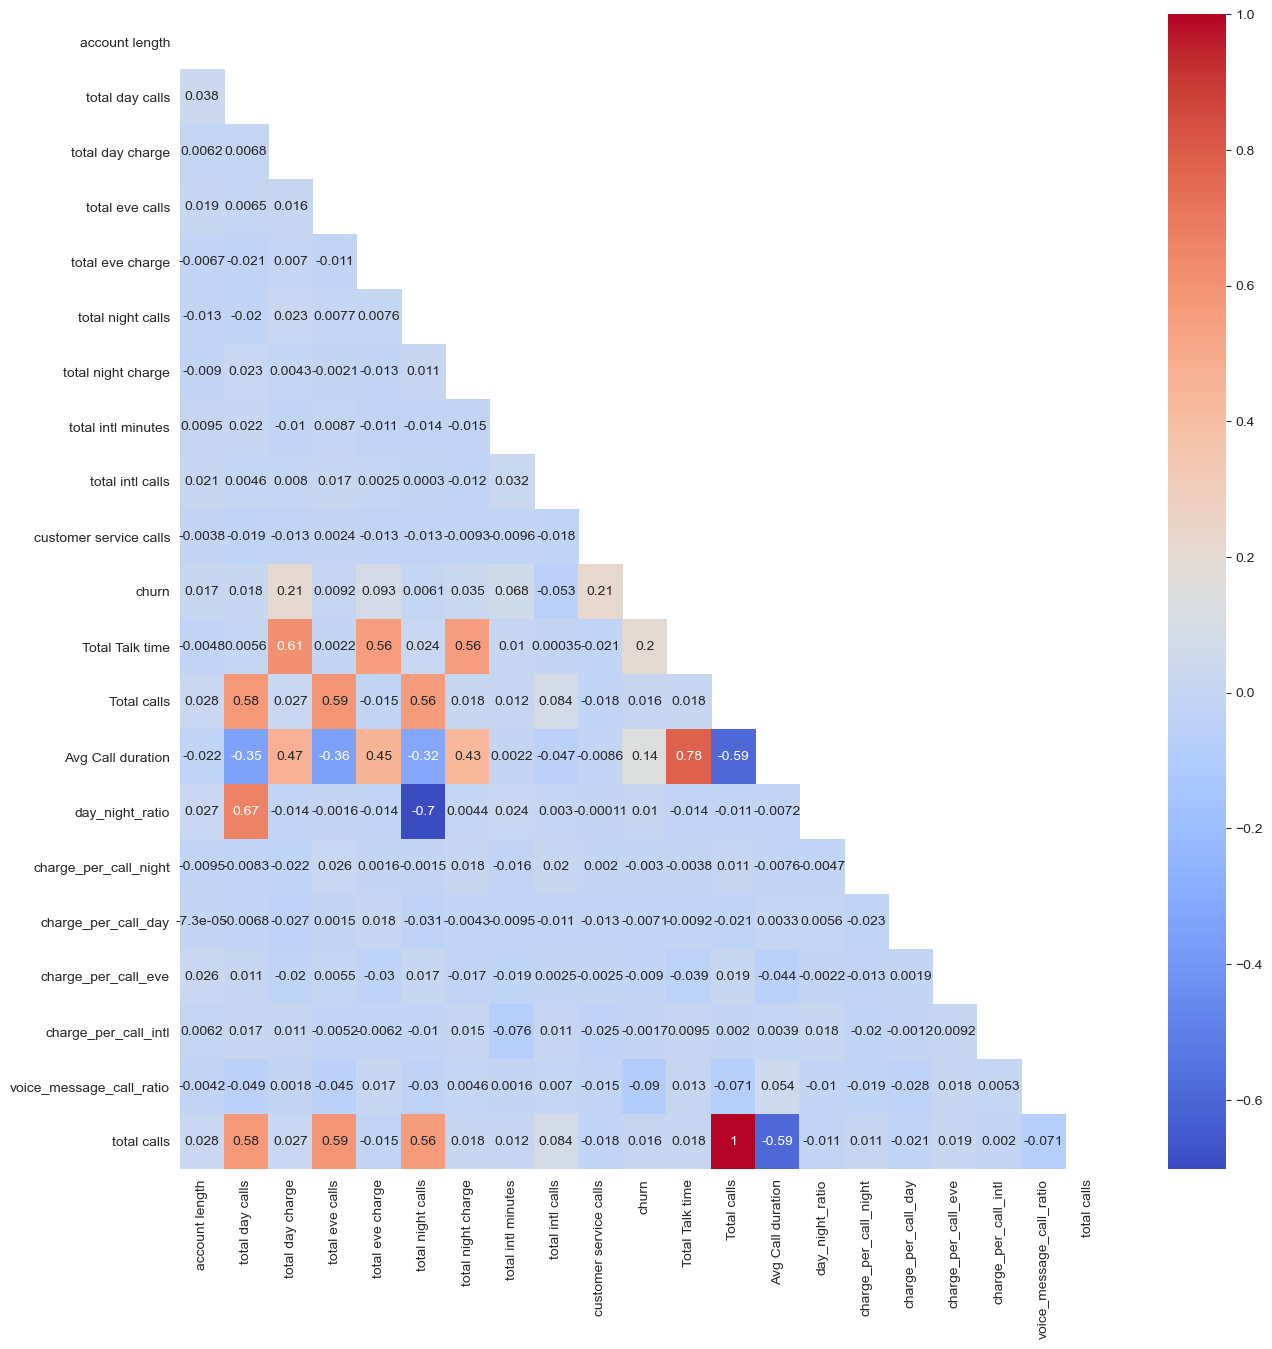

In [146]:

# Create a correlation matrix
corr_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask=mask)

plt.show()


Blue shades: Represent negative correlations, with darker blue indicating stronger negative correlation.
very light blue  Represents zero correlation.
orange shades: Represent positive correlations, with darker red indicating stronger positive correlation.
In this color scheme, the strongest negative correlations are represented by the darkest blue, and the strongest positive correlations are represented by the darkest red. The center (white) represents variables with no correlation (correlation coefficient close to zero).

## Conclusion from the EDA

1. Some states had a higher churn rate compared to other states and this could be because of coverage issues.
2. The area codes and account length does not play any significant role regarding the churn rate making the column quiet redundant. 
3. Customers with international plans churn more as compared to customers without the plan and also the international calling charges are very high and this could cause churns if the rates are high yet there are network issues.
4. In customers with more than 20 voicemail messages, the churn rate was high and this could actually mean that the voicemail quality is not good.
5. 'total day minutes', 'total day calls', 'total day charge' ,'total eve minutes', 'total eve calls', 'total eve charge','total night minutes', 'total night calls', 'total night charge' did not play any role in regards to customer churn.
6. And whenever a customer calls the customer service, because they are unsatisfied, the churn was high and this si to mean that the issues are not being resolved by the customer service.
      

In [147]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

#### **Scaling and Encoding**

In [148]:
# Drop phone number column as it is not required for prediction 
df = df.drop('phone number', axis=1)
df.dropna(inplace=True)

In [149]:
df.select_dtypes(include=np.number).columns

Index(['account length', 'total day calls', 'total day charge',
       'total eve calls', 'total eve charge', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'customer service calls', 'churn', 'Total Talk time', 'Total calls',
       'Avg Call duration', 'day_night_ratio', 'charge_per_call_night',
       'charge_per_call_day', 'charge_per_call_eve', 'charge_per_call_intl',
       'voice_message_call_ratio', 'total calls'],
      dtype='object')

In [150]:
# Define numerical and categorical features
categorical_features = ['state', 'area code', 'international plan', 'voice mail plan']

numerical_features = ['account length', 'total day calls', 'total day charge',
'total eve calls', 'total eve charge', 'total night calls',
'total night charge', 'total intl minutes', 'total intl calls',
'customer service calls', 'Total Talk time', 'Total calls',
'Avg Call duration', 'day_night_ratio', 'charge_per_call_night',
'charge_per_call_day', 'charge_per_call_eve', 'charge_per_call_intl',
'voice_message_call_ratio', 'total calls']

In [151]:
# scaling the numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [152]:
# One hot encode categorical data
df = pd.get_dummies(df, columns=categorical_features)

### **Modelling**

#### **Splitting Data**

In [153]:
# features and target

# feature
X = df.drop('churn', axis=1)
# Target
y = df['churn']


In [154]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
# Value counts for target variable
y_train.value_counts()

0    2256
1     393
Name: churn, dtype: int64

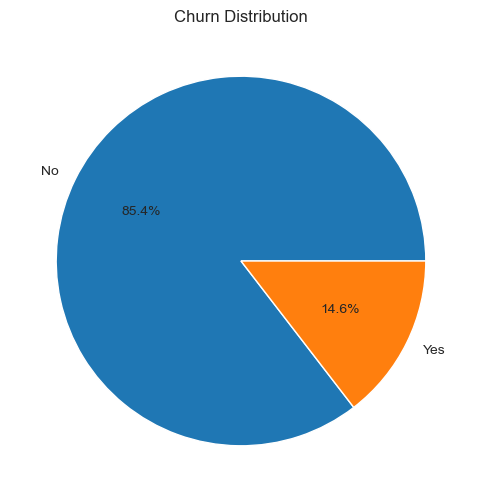

In [156]:
# Visualizing the target variable distribution 
plt.figure (figsize=(8, 6))
plt.pie(df['churn'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

15% are customers who churned from Syria Tel while 85% did not churn from Syria Tel.

This shows there is a class imbalance since one is very high compared to the other value and this class imbalance can be solved by SMOTE.

In [157]:
# DEFINE FEATURES AND TARGET
y = df['churn']

X = df.drop('churn', axis=1)


In [158]:
## splitting whole dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [159]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2649, 78)
X_test shape: (663, 78)
y_train shape: (2649,)
y_test shape: (663,)


### Using SMOTE to deal with class imbalance in the target variable 

In [160]:


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
# Apply SMOTE to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


## **Baseline Model**

### **Decison Tree Classifier**

In [161]:
# Create an instance of decision tree
clf = DecisionTreeClassifier(random_state=42)

In [162]:
# Fit the model on the training data
clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [163]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

#### **Evaluating the model before tuning**

In [164]:
def evaluating_model_performance(model, X_train, y_train, X_test, y_test):
    """
    Evaluates the performance of a given model on the training and test sets.
    """
    # fit the model
    model.fit(X_train, y_train)
    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)  
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate the precision
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    # Calculate the recall
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    # Calculate the F1 score
    train_f1_score = f1_score(y_train, y_train_pred)
    test_f1_score = f1_score(y_test, y_test_pred)

    # Print the evaluation metrics
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("Train Precision:", train_precision)
    print("Test Precision:", test_precision)
    print("Train Recall:", train_recall)
    print("Test Recall:", test_recall)
    print("Train F1 Score:", train_f1_score)
    print("Test F1 Score:", test_f1_score)


In [165]:
evaluating_model_performance(clf, X_train_resampled, y_train_resampled, X_test, y_test)


Train Accuracy: 1.0
Test Accuracy: 0.8989441930618401
Train Precision: 1.0
Test Precision: 0.6057692307692307
Train Recall: 1.0
Test Recall: 0.7078651685393258
Train F1 Score: 1.0
Test F1 Score: 0.6528497409326425


#### **Tuning the model.**

In [166]:
# Using grid search to find optimal hyperparameters

# defining the parameters for grid search
params = {
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# instance of DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# grid search
grid_search = GridSearchCV(clf, params, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# print best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [167]:
# best model
best_clf = grid_search.best_estimator_
y_predd = best_clf.predict(X_test)

#### **Evaluation after tuning**

In [168]:
# Evaluate tuned decision tree model
evaluating_model_performance(best_clf, X_train_resampled, y_train_resampled, X_test, y_test)

Train Accuracy: 0.9574468085106383
Test Accuracy: 0.9245852187028658
Train Precision: 0.9877126654064272
Test Precision: 0.7191011235955056
Train Recall: 0.9264184397163121
Test Recall: 0.7191011235955056
Train F1 Score: 0.9560841720036597
Test F1 Score: 0.7191011235955056


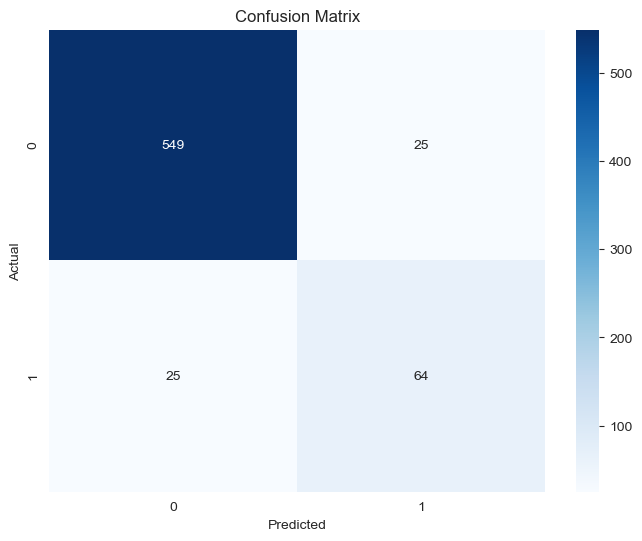

In [169]:
# Plot confusion matrix
my_confusion_mat = confusion_matrix(y_test, y_predd)

plt.figure(figsize=(8, 6))
sns.heatmap(my_confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


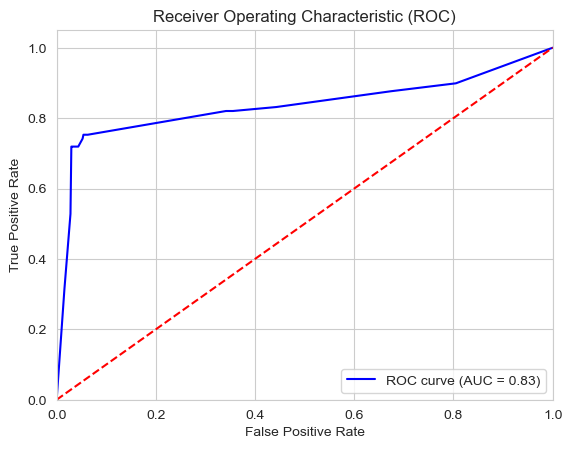

In [170]:
# Obtain predicted probabilities for the positive class
y_scores = best_clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)


# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Summary and Comparison of the two models:
1. The tuned model shows an improvement in both train and test accuracy, indicating better generalization to unseen data.
2. The tuned model exhibits higher precision on both train and test sets, suggesting a better ability to correctly identify positive cases without many false positives.
3.  While the tuned model has slightly lower recall on the train set, it maintains a similar level on the test set. Recall is the ability of the model to capture all positive instances, and the tuned model still performs reasonably well.
4.  The tuned model outperforms the baseline in terms of F1 score on both train and test sets. F1 score considers both precision and recall, providing a balanced measure.

The tuned model appears to be an improvement over the baseline in terms of accuracy, precision, recall, and F1 score. It strikes a better balance between correctly identifying positive cases and minimizing false positives. In summary, the tuned model is likely a better choice for predicting customer churn, as it provides an overall improvement in performance across multiple metrics.

### **Logistic Regression, Random Forests and Gradient Boost models** 

In [171]:
# Model selection and hyperparameter tuning
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}
for model_name, model in models.items():
    # Train the model on the resampled data
    model.fit(X_train_resampled, y_train_resampled)

In [172]:
def calculate_metrics(y_true, y_pred):
    """
    Calculate model performance metrics: accuracy, precision, recall, and F1-score.
    :param y_true: True labels.
    :param y_pred: Predicted labels.
    :return: Dictionary of metrics.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Return as a dictionary
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Dictionary to hold the results
results = {}

# For each model
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate metrics
    
    metrics_test = calculate_metrics(y_test, y_pred_test)
    metrics_train = calculate_metrics(y_train, y_pred_train)
    
    # Store the results
    results[(model_name, 'Test')] = metrics_test
    results[(model_name, 'Train')] = metrics_train

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T

results_df

Accuracy  Precision    Recall  F1-score
Logistic Regression Test   0.873303   0.545455  0.337079  0.416667
                    Train  0.867120   0.579151  0.381679  0.460123
Random Forest       Test   0.926094   0.803030  0.595506  0.683871
                    Train  1.000000   1.000000  1.000000  1.000000
Gradient Boosting   Test   0.938160   0.785714  0.741573  0.763006
                    Train  0.968290   0.909814  0.872774  0.890909

### **Random Forest Tuning**

In [173]:
rf_params = {
    'n_estimators': [50,100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [174]:
for model_name, model in models.items():
    if model_name == "Random Forest":
        # Create the GridSearchCV or RandomizedSearchCV instance
        grid_search = GridSearchCV(model, rf_params, cv=5, n_jobs=-1)
        # Fit the model on the resampled data with hyperparameter search
        grid_search.fit(X_train_resampled, y_train_resampled)
        # Get the best hyperparameters
        best_params = grid_search.best_params_
        print(f"Best Hyperparameters for {model_name}: {best_params}")
        # Use the best hyperparameters for the final model
        model = grid_search.best_estimator_
    else:
        # For other models, you can follow similar steps with their respective hyperparameter grid.
        model.fit(X_train_resampled, y_train_resampled)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [175]:
# new random forest model with the best parameters
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=1,
    random_state=42,
    class_weight="balanced"
)

# Fit the model
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       n_estimators=150, random_state=42)

In [176]:

# Make predictions on the training data
y_train_pred = rf.predict(X_train_resampled)

# Make predictions on the test data
y_test_pred = rf.predict(X_test)

# Evaluate the model on the training set
print("Training Set Performance:")
print(f"Accuracy: {accuracy_score(y_train_resampled, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train_resampled, y_train_pred):.4f}")
print(f"Recall: {recall_score(y_train_resampled, y_train_pred):.4f}")
print(f"F1 Score: {f1_score(y_train_resampled, y_train_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_train_resampled, y_train_pred)}")

# Evaluate the model on the test set
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")


Training Set Performance:
Accuracy: 0.9998
Precision: 1.0000
Recall: 0.9996
F1 Score: 0.9998
Confusion Matrix:
[[2256    0]
 [   1 2255]]

Test Set Performance:
Accuracy: 0.9306
Precision: 0.8308
Recall: 0.6067
F1 Score: 0.7013
Confusion Matrix:
[[563  11]
 [ 35  54]]


In [177]:
# Fit the RandomForestClassifier with the best hyperparameters on the training data
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training data
y_train_pred = rf.predict(X_train)

# Make predictions on the test data
y_test_pred = rf.predict(X_test)

# Evaluate the model on the training set
evaluating_model_performance(rf, X_train, y_train, X_test, y_test)

Train Accuracy: 1.0
Test Accuracy: 0.918552036199095
Train Precision: 1.0
Test Precision: 0.9487179487179487
Train Recall: 1.0
Test Recall: 0.4157303370786517
Train F1 Score: 1.0
Test F1 Score: 0.578125


In [178]:
# Make predictions on the test set
y_test_pred_rf = rf.predict(X_test)

The model achieved an accuracy of 91% on the test data, and overal model performance of 57% as the F1 score indicating a good balance bwetween recall and precision.

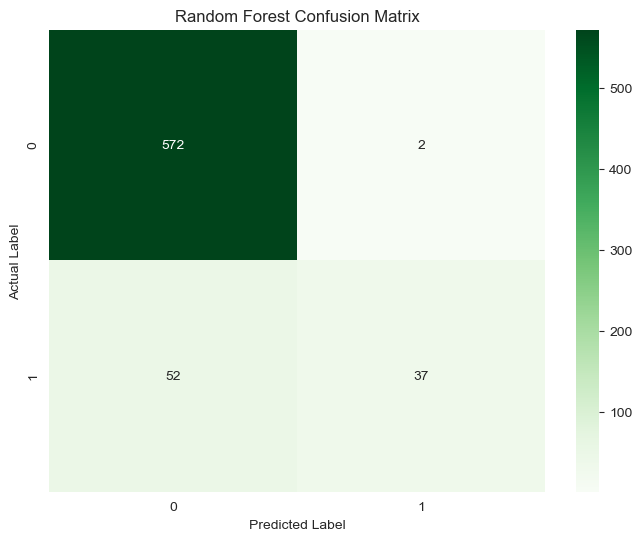

In [179]:
# Create a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### **Tuning Logistic Regression**

In [180]:
# Defining the hyperparameters
logistic_params_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
}

In [181]:
# Logistic regression model
logreg = LogisticRegression()

# Create the grid search CV
grid_search = GridSearchCV(logreg, logistic_params_grid, cv=5, n_jobs=-1)

# Fit the model on the resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Use best hyperparameters to fit the model
best_logistic_model = LogisticRegression(**best_params)

# Fit the model on the training data
best_logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_test_pred = best_logistic_model.predict(X_test)

# Evaluate the model
evaluating_model_performance(best_logistic_model, X_train_resampled, y_train_resampled, X_test, y_test)


Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Train Accuracy: 0.9175531914893617
Test Accuracy: 0.8808446455505279
Train Precision: 0.9640394088669951
Test Precision: 0.631578947368421
Train Recall: 0.8674645390070922
Test Recall: 0.2696629213483146
Train F1 Score: 0.9132057862809146
Test F1 Score: 0.3779527559055118


This model has achieved an accuracy score of 88% on test data predicting non churn better than it predicts churning and this makes it worse compared to the random forest model.

### **Gradient Boost Model Tuning**

In [182]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Create gradient boosting classifier with learning_rate='constant'
gradient_boosting = GradientBoostingClassifier(learning_rate=0.01, n_estimators=100, random_state=42)

# Define the parameter grid for grid search
gradient_params_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
}


# (Make sure gradient_params_grid is defined before this step)
grid_search_gradient = GridSearchCV(gradient_boosting, gradient_params_grid, cv=5, n_jobs=-1)

# Step 3: Fit the model using grid search on the resampled data
grid_search_gradient.fit(X_train_resampled, y_train_resampled)

# Step 4: Get the best hyperparameters
best_params = grid_search_gradient.best_params_

# Step 5: Create a new model with the best hyperparameters
best_gradient_boosting_model = GradientBoostingClassifier(**best_params)

# Step 6: Fit the new model on the resampled data
best_gradient_boosting_model.fit(X_train_resampled, y_train_resampled)

# Step 7: Make predictions on the test data
y_test_pred_gradient = best_gradient_boosting_model.predict(X_test)

# Step 8: Evaluate the model
evaluating_model_performance(best_gradient_boosting_model, X_train_resampled, y_train_resampled, X_test, y_test)


Train Accuracy: 1.0
Test Accuracy: 0.9441930618401206
Train Precision: 1.0
Test Precision: 0.8421052631578947
Train Recall: 1.0
Test Recall: 0.7191011235955056
Train F1 Score: 1.0
Test F1 Score: 0.7757575757575758


- Logistic Regression: The model performs moderately on the test set with an accuracy of approximately 87.1%. It has relatively low precision (54%), indicating that it has a higher false-positive rate, and moderate recall (33.25%), implying it can identify only about half of the positive cases correctly. The F1-score, which balances precision and recall, is around 41.07%. On the train set, the model shows similar performance but slightly higher precision  (57.44%).

- Random Forest: The model performs well on the test set with an accuracy of approximately 92%. It has high precision (80%) and moderate recall (579.29%). The F1-score, which is 68.38%, indicates a good balance between precision and recall. On the train set, the model performs perfectly, which suggests potential overfitting.

- Gradient Boosting: The model performs excellently on the test set with an accuracy of approximately 94.28%. It has high precision (83.77%) and recall (72.29%), which indicates it can correctly identify a significant portion of the positive cases while minimizing false positives. The F1-score is 77.10- %, indicating a well-balanced performance. On the train set, the model shows similar strong performance with high precision, recall, and F1-score.

Overall, Gradient Boosting demonstrates the best performance among the three models, achieving high accuracy and balanced precision-recall trade-off on the test set.

### **Feature Importances**

We are going to find the significance or contribution of various elements, features, or factors within our model

In [185]:


# Assuming logreg is your LogisticRegression model and X_train is your training data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Now you can access the coefficients
feature_importance = logreg.coef_[0]

# Create a DataFrame to store feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Print or use the feature importances as needed
print(feature_importance_df)


                   feature  importance
75  international plan_yes    1.018743
46                state_MT    0.890269
67                state_WA    0.851259
24                state_CA    0.827760
60                state_SC    0.794818
..                     ...         ...
20                state_AK   -0.759894
66                state_VT   -0.936546
74   international plan_no   -1.018037
65                state_VA   -1.040109
59                state_RI   -1.084322

[78 rows x 2 columns]


In [186]:
# Feature importance
feature_importance = logreg.coef_[0]
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

                   feature  importance
75  international plan_yes    1.018743
46                state_MT    0.890269
67                state_WA    0.851259
24                state_CA    0.827760
60                state_SC    0.794818
..                     ...         ...
20                state_AK   -0.759894
66                state_VT   -0.936546
74   international plan_no   -1.018037
65                state_VA   -1.040109
59                state_RI   -1.084322

[78 rows x 2 columns]


In [187]:
# select top 10 features 
top_features = feature_importance_df.head(10)
top_features.sort_values(by='importance', inplace=True)
top_features

,feature,importance
51,state_NJ,0.577366
9,customer service calls,0.656716
42,state_MI,0.686250
76,voice mail plan_no,0.742951
63,state_TX,0.750098
60,state_SC,0.794818
24,state_CA,0.827760
67,state_WA,0.851259
46,state_MT,0.890269
75,international plan_yes,1.018743


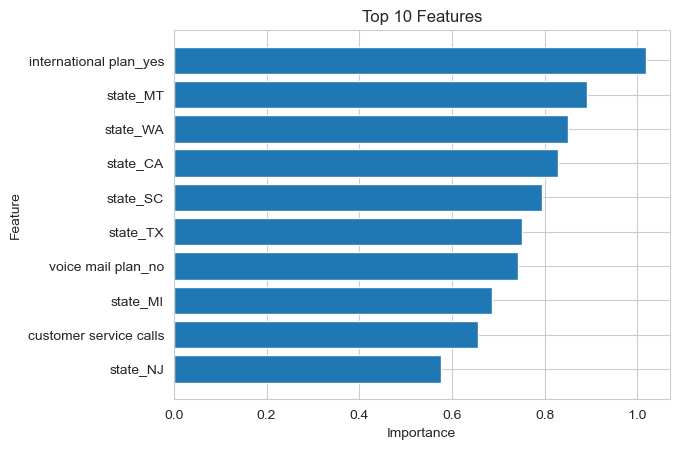

In [188]:
# plot the features 
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features')
plt.show()

From the feature imporatnce values we see that :
1. Customer Service Calls (5.728790):
The number of customer service calls is the most influential feature in predicting churn. A high number of customer service calls is often associated with customer dissatisfaction or issues, which can increase the likelihood of churn.
2. Total Day Charge (3.486883):
This feature has the highest importance, suggesting that the total charge for daytime calls has a significant impact on predicting customer churn. High total day charges might indicate that customers who spend more on daytime calls are more likely to churn.
3. Total Eve Minutes (1.317189) and Total Eve Charge (1.313020):
Both total evening minutes and total evening charges are important features. This suggests that customer behavior in the evening (e.g., high usage or charges) plays a role in predicting churn.
4. International Plan (1.259352):
The presence of an international plan is a significant factor. Customers with an international plan might have specific needs or usage patterns that influence their likelihood of churn.
5. Total Day Minutes (1.730629):
The total number of daytime minutes is an important predictor. High daytime usage might indicate active use of the service, but it can also contribute to higher charges, impacting customer decisions.
6. State_MT (1.391398), State_MS (1.133431), State_TX (1.140630), State_SC (1.286994):
The state of the customer seems to be a relevant factor. Different states may have varying demographics, competitive landscapes, or service quality, impacting customer churn

### **Conclusion**

**Model Performance:**

- The churn prediction models seem to have reasonably good performance based on the metrics used (accuracy, precision, recall, and F1-score), with Gradient Boosting performing the best with an Accuracy of 94.26% and Recall of 72% after tuning.
- The model tuning for the Decision Tree model led to an improvement in accuracy and precision but a decrease in recall. This indicates a trade-off between correctly predicting positive instances and capturing all actual positive instances.

**Key Features:**

'international_plan', 'voice nail plan', and 'customer_service_calls' emerged as the most influential features for predicting churn. This suggests that customers with an international plan, those who have a high total charge, and those who have made more customer service calls are more likely to churn.


**Recommendations**


Based on our findings, we recommend the following:

Review International Plan: Given its importance in predicting churn, it would be beneficial to review the structure and pricing of the international plan to ensure it meets customer needs.

Improve Customer Service: The number of customer service calls is a strong predictor of churn. Efforts should be made to improve the customer service experience to reduce the likelihood of churn.

Analyze Pricing Structure: Customers with a higher total charge are more likely to churn. A review of pricing strategies and structures could help to ensure they are competitive and provide value to customers.

Adress the issue of network coverage for some states.